In [1]:
# import required libraries to munge data
import pandas as pd
import numpy as np

In [2]:
# import matplotlib to draw plot inside of notebook
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
# Start from grid table
acc_table = pd.read_csv("grid.csv", header=0)
grid_table = acc_table

In [4]:
# Make 10 random tables
random_table_list = []
for i in range(10):
    randomized_table = acc_table.sample(frac=1).reset_index(drop=True)
    random_table = pd.DataFrame(randomized_table[["Setting", "Step",  "Param1", "Param2", "Param3", "Param4",\
                                           "Elapsed Time", "Metric1"]])
    random_table_list.append(random_table)

print len(random_table_list)

10


In [5]:
# Check shuffled
print random_table_list[2].head(10)

                                       Setting     Step  Param1  Param2  \
0     filter:6-conv1:128-conv2:4-fc:2-Momentum  1_epoch       6     128   
1     filter:6-conv1:32-conv2:64-fc:2-Momentum  1_epoch       6      32   
2     filter:12-conv1:8-conv2:8-fc:64-Momentum  1_epoch      12       8   
3     filter:4-conv1:4-conv2:1-fc:128-Momentum  1_epoch       4       4   
4   filter:12-conv1:1-conv2:64-fc:128-Momentum  1_epoch      12       1   
5      filter:6-conv1:8-conv2:4-fc:32-Momentum  1_epoch       6       8   
6     filter:6-conv1:16-conv2:2-fc:64-Momentum  1_epoch       6      16   
7      filter:2-conv1:32-conv2:2-fc:4-Momentum  1_epoch       2      32   
8     filter:6-conv1:64-conv2:1-fc:16-Momentum  1_epoch       6      64   
9  filter:8-conv1:512-conv2:32-fc:128-Momentum  1_epoch       8     512   

   Param3  Param4  Elapsed Time  Metric1  
0       4       2         0.493    38.56  
1      64       2         0.424    10.28  
2       8      64         0.345    96.89  
3 

In [6]:
# cumulate elapsed time to Total time
def get_total_time_list(test_acuracies):
    count = len(test_acuracies)
    current_total = 0
    total_times = []
    for i in range(count):
        test_time = test_acuracies["Elapsed Time"][i]
        current_total += test_time
        total_times.append(current_total)
    return total_times


In [7]:
# add total time column

grid_table["Total Time"] = get_total_time_list(grid_table)

for i in range(len(random_table_list)):
    random_table = random_table_list[i]
    random_table["Total Time"] = get_total_time_list(random_table)
    

In [ ]:
# check Total time
random_table_list[3].head(10)

In [8]:
def get_best_acc_list(table):
    count = len(table)
    current_best = 0
    best_acc = []
    for i in range(count):
        test_acc = table["Metric1"][i]
        if current_best < test_acc:
            current_best = test_acc

        best_acc.append(current_best)
    return best_acc

best_acc_list = get_best_acc_list(random_table_list[0]) 

In [9]:
# Add current best accuracy column
for i in range(len(random_table_list)):
    random_table = random_table_list[i]
    best_acc_list = get_best_acc_list(random_table) 
    random_table['Best'] = best_acc_list

random_table_list[9].head(10)

,Setting,Step,Param1,Param2,Param3,Param4,Elapsed Time,Metric1,Total Time,Best
0,filter:4-conv1:128-conv2:64-fc:8-Momentum,1_epoch,4,128,64,8,0.749,79.71,0.749,79.71
1,filter:12-conv1:256-conv2:8-fc:512-Momentum,1_epoch,12,256,8,512,0.870,10.28,1.619,79.71
2,filter:8-conv1:256-conv2:4-fc:256-Momentum,1_epoch,8,256,4,256,0.743,10.28,2.362,79.71
3,filter:2-conv1:64-conv2:64-fc:256-Momentum,1_epoch,2,64,64,256,0.292,96.58,2.654,96.58
4,filter:12-conv1:8-conv2:128-fc:4-Momentum,1_epoch,12,8,128,4,0.304,10.28,2.958,96.58
5,filter:14-conv1:4-conv2:32-fc:64-Momentum,1_epoch,14,4,32,64,0.297,95.25,3.255,96.58
6,filter:8-conv1:4-conv2:4-fc:1-Momentum,1_epoch,8,4,4,1,0.154,29.54,3.409,96.58
7,filter:12-conv1:8-conv2:32-fc:512-Momentum,1_epoch,12,8,32,512,0.232,96.50,3.641,96.58
8,filter:12-conv1:512-conv2:2-fc:2-Momentum,1_epoch,12,512,2,2,1.550,38.43,5.191,96.58
9,filter:8-conv1:16-conv2:512-fc:64-Momentum,1_epoch,8,16,512,64,0.769,92.21,5.960,96.58


In [10]:
# Save random search results
csv_file_preamble = 'random_best_'
for i in range(len(random_table_list)):
    random_table = random_table_list[i]
    csv_file_name = csv_file_preamble + str(i) + '.csv'
    random_table.to_csv(csv_file_name)

In [11]:
# Save grid table
best_acc_list = get_best_acc_list(grid_table) 
grid_table['Best'] = best_acc_list
grid_table.to_csv('grid_best.csv')

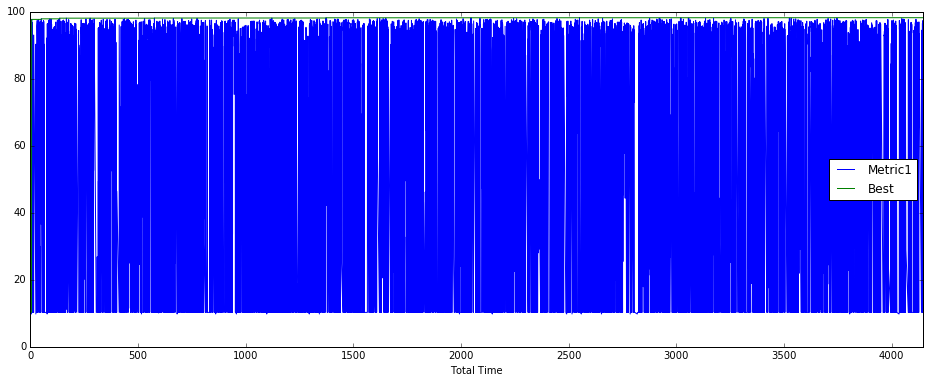

In [12]:
random_table_list[0].plot(x="Total Time", y=["Metric1", "Best"], figsize=(16, 6))

In [13]:
def to_figure(table, algorithm, y_range=[0, 100], show=True):
    fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    subplot = fig.add_subplot(1, 1, 1)
    subplot.plot(table["Total Time"], table["Metric1"], "bo", label="Test Accuracy")
    subplot.plot(table["Total Time"], table["Best"], "r-", label="Best Accuracy")
    title = algorithm  + " test accuracy trends"
    subplot.set_title(title)
    x_max = table["Total Time"][len(table["Total Time"]) - 1]
    subplot.set_xlim([0, x_max])
    subplot.set_ylim(y_range)
    plt.ylabel("test accuracy")
    plt.xlabel("operation time")
    plt.legend(loc="best")
    if show:
        plt.show()
    return fig

In [ ]:
fig = to_figure(grid_table, "grid")
fig.savefig('total_time-test_acc.png', format='png', dpi=900)

In [ ]:
for i in range(len(random_table_list)):
    random_table = random_table_list[i]
    search_type = "random " + str(i)
    fig = to_figure(random_table, search_type)
    fig.savefig(search_type + '-total_time-test_acc.png', format='png', dpi=900, show=False)

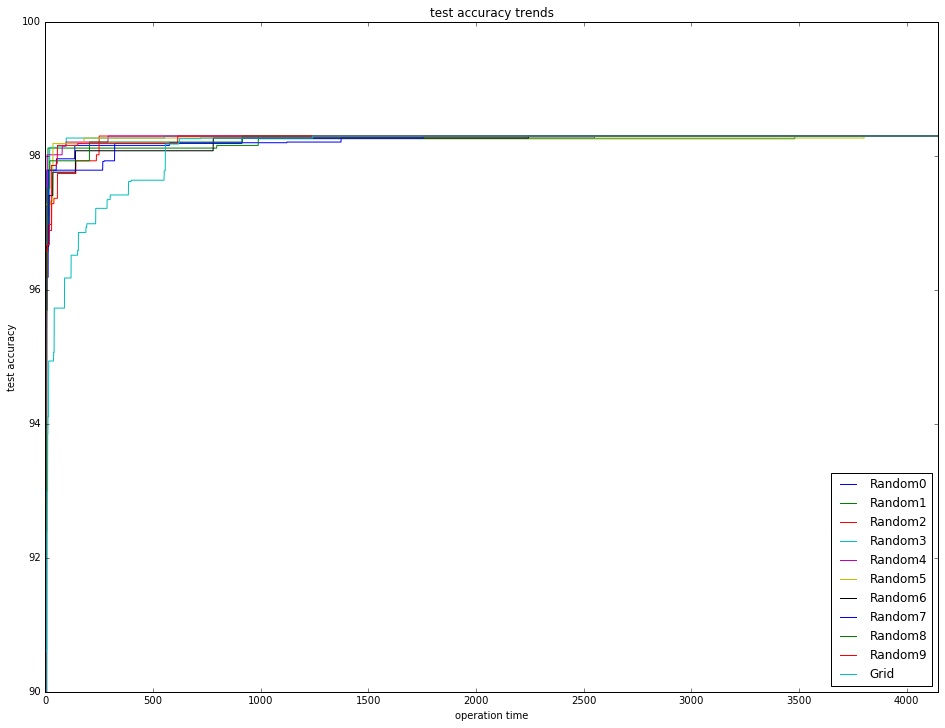

In [35]:
y_range = [90, 100]
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
subplot = fig.add_subplot(1, 1, 1)
for i in range(len(random_table_list)):
    algortithm = "Random" + str(i)
    random_table = random_table_list[i] 
    subplot.plot(random_table["Total Time"], random_table["Best"], label=algortithm)

subplot.plot(grid_table["Total Time"], grid_table["Best"], label="Grid")

title = "test accuracy trends"    
subplot.set_title(title)
x_max = grid_table["Total Time"][len(grid_table["Total Time"]) - 1]
subplot.set_xlim([0, x_max])
subplot.set_ylim(y_range)
plt.ylabel("test accuracy")
plt.xlabel("operation time")
plt.legend(loc="best")
plt.show()


In [36]:
fig.savefig('best_accs_compare.png', format='png', dpi=900)